# Feature Engineering & Feature Extraction

## Attaching Resources

### Importing Necessary Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [67]:
wp = pd.read_csv(r'C:\Users\Kunal Mallick\Documents\GitHub\Churn_Prediction\resources\Churn.csv', index_col= 0)

wp

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


### Performing Data Cleaning

#### day.charge

In [68]:
wp[wp['day.charge'] == 'Nan'].shape

(7, 20)

In [69]:
dc = wp[wp['day.charge'] == 'Nan'].index

len(dc)

7

In [70]:
drop = []

for i in dc:
    drop.append(i)

drop

[13, 28, 48, 4408, 4756, 4966, 4993]

#### eve.mins

In [71]:
wp[wp['eve.mins'] == 'Nan'].shape

(24, 20)

In [72]:
em = wp[wp['eve.mins'] == 'Nan'].index

len(em)

24

In [73]:
for i in em:
    drop.append(i)

#### Droping All Nan Data

In [74]:
sorted(drop)

[13,
 28,
 48,
 90,
 103,
 111,
 160,
 232,
 255,
 300,
 346,
 461,
 558,
 625,
 685,
 730,
 751,
 796,
 893,
 1013,
 1100,
 1220,
 1418,
 1484,
 1626,
 1700,
 1779,
 4408,
 4756,
 4966,
 4993]

In [75]:
wp.drop(drop, inplace = True)

wp

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [76]:
wp.reset_index(inplace=True)
wp.drop(columns='index',inplace=True)

wp

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4965,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4966,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4967,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [77]:
wp['day.charge'] = wp['day.charge'].apply(lambda x: float(x))
wp['eve.mins'] = wp['eve.mins'].apply(lambda x: float(x))

wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4969 non-null   object 
 1   area.code       4969 non-null   object 
 2   account.length  4969 non-null   int64  
 3   voice.plan      4969 non-null   object 
 4   voice.messages  4969 non-null   int64  
 5   intl.plan       4969 non-null   object 
 6   intl.mins       4969 non-null   float64
 7   intl.calls      4969 non-null   int64  
 8   intl.charge     4969 non-null   float64
 9   day.mins        4969 non-null   float64
 10  day.calls       4969 non-null   int64  
 11  day.charge      4969 non-null   float64
 12  eve.mins        4969 non-null   float64
 13  eve.calls       4969 non-null   int64  
 14  eve.charge      4969 non-null   float64
 15  night.mins      4969 non-null   float64
 16  night.calls     4969 non-null   int64  
 17  night.charge    4969 non-null   f

### Converting Categorical Data to Numerical Data

In [78]:
le = LabelEncoder()

In [79]:
wp['state'] = le.fit_transform(wp['state'])
wp['area.code'] = le.fit_transform(wp['area.code'])
wp['voice.plan'] = le.fit_transform(wp['voice.plan'])
wp['intl.plan'] = le.fit_transform(wp['intl.plan'])
wp['churn'] = le.fit_transform(wp['churn'])

wp

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4965,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4966,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4967,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [80]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4969 non-null   int32  
 1   area.code       4969 non-null   int32  
 2   account.length  4969 non-null   int64  
 3   voice.plan      4969 non-null   int32  
 4   voice.messages  4969 non-null   int64  
 5   intl.plan       4969 non-null   int32  
 6   intl.mins       4969 non-null   float64
 7   intl.calls      4969 non-null   int64  
 8   intl.charge     4969 non-null   float64
 9   day.mins        4969 non-null   float64
 10  day.calls       4969 non-null   int64  
 11  day.charge      4969 non-null   float64
 12  eve.mins        4969 non-null   float64
 13  eve.calls       4969 non-null   int64  
 14  eve.charge      4969 non-null   float64
 15  night.mins      4969 non-null   float64
 16  night.calls     4969 non-null   int64  
 17  night.charge    4969 non-null   f

## Splitting The Data Into Target and Independent set

In [81]:
x = wp.drop(columns='churn')
y = wp['churn']

In [82]:
x

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4965,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4966,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1
4967,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0


In [83]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4964    0
4965    1
4966    0
4967    0
4968    0
Name: churn, Length: 4969, dtype: int32

## Performing Feature Selection

### Performing Univariate Selection

In [84]:
test = SelectKBest(score_func=chi2, k=5)
test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x00000216B207F880>)

In [85]:
test.scores_

array([1.95045137e+00, 1.09567447e-01, 3.54654529e+01, 4.57368976e+01,
       1.14251282e+03, 3.05958303e+02, 1.42091689e+01, 1.46659974e+01,
       3.83420936e+00, 3.46590253e+03, 5.04530237e+00, 5.89160894e+02,
       5.02409494e+02, 5.97518524e-01, 4.26973103e+01, 1.30939624e+02,
       8.97285173e-01, 5.89111049e+00, 2.46103231e+02])

In [86]:
chi_test = pd.DataFrame(test.scores_).T
chi_test.columns = x.columns

chi_test

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,1.950451,0.109567,35.465453,45.736898,1142.512819,305.958303,14.209169,14.665997,3.834209,3465.902526,5.045302,589.160894,502.409494,0.597519,42.69731,130.939624,0.897285,5.89111,246.103231


### Performing Recursive Feature Elimination

In [87]:
rfe = RFE(LogisticRegression())
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [88]:
rfe.get_support()

array([False,  True, False,  True,  True,  True, False,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True])

In [89]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,3,1,7,1,1,1,8,1,10,1,2,5,4,1,9,6,1,11,1


### Performing Tree Based method

In [90]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [91]:

dt.feature_importances_

array([0.00939851, 0.01419524, 0.02514222, 0.01758008, 0.04632142,
       0.06870826, 0.01629332, 0.07802426, 0.09307529, 0.16367441,
       0.01607109, 0.09837789, 0.10086783, 0.0119802 , 0.03730398,
       0.03421088, 0.01921273, 0.0420914 , 0.10747098])

In [92]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'CHI' : test.scores_,
    'RFE_RANK' : rfe.ranking_,
    'RFE_SUP' : rfe.get_support(),
    'IG' : dt.feature_importances_
})

imp_cols

,Features,CHI,RFE_RANK,RFE_SUP,IG
0,state,1.950451,3,False,0.009399
1,area.code,0.109567,1,True,0.014195
2,account.length,35.465453,7,False,0.025142
3,voice.plan,45.736898,1,True,0.017580
4,voice.messages,1142.512819,1,True,0.046321
5,intl.plan,305.958303,1,True,0.068708
6,intl.mins,14.209169,8,False,0.016293
7,intl.calls,14.665997,1,True,0.078024
8,intl.charge,3.834209,10,False,0.093075
9,day.mins,3465.902526,1,True,0.163674


In [93]:
#imp_cols.to_csv('Feature Selection.csv', index=False)

### Compairing All Result

In [94]:
r = chi_test.T
r.columns = ['chi_test']

r.sort_values(by='chi_test', ascending=False)

,chi_test
day.mins,3465.902526
voice.messages,1142.512819
day.charge,589.160894
eve.mins,502.409494
intl.plan,305.958303
customer.calls,246.103231
night.mins,130.939624
voice.plan,45.736898
eve.charge,42.697310
account.length,35.465453


In [95]:
r2 = rfe_df.T
r2.columns = ['rfe']

r2.sort_values(by='rfe')

,rfe
day.mins,1
night.calls,1
eve.calls,1
intl.calls,1
intl.plan,1
customer.calls,1
voice.plan,1
area.code,1
voice.messages,1
day.calls,2


<Axes: >

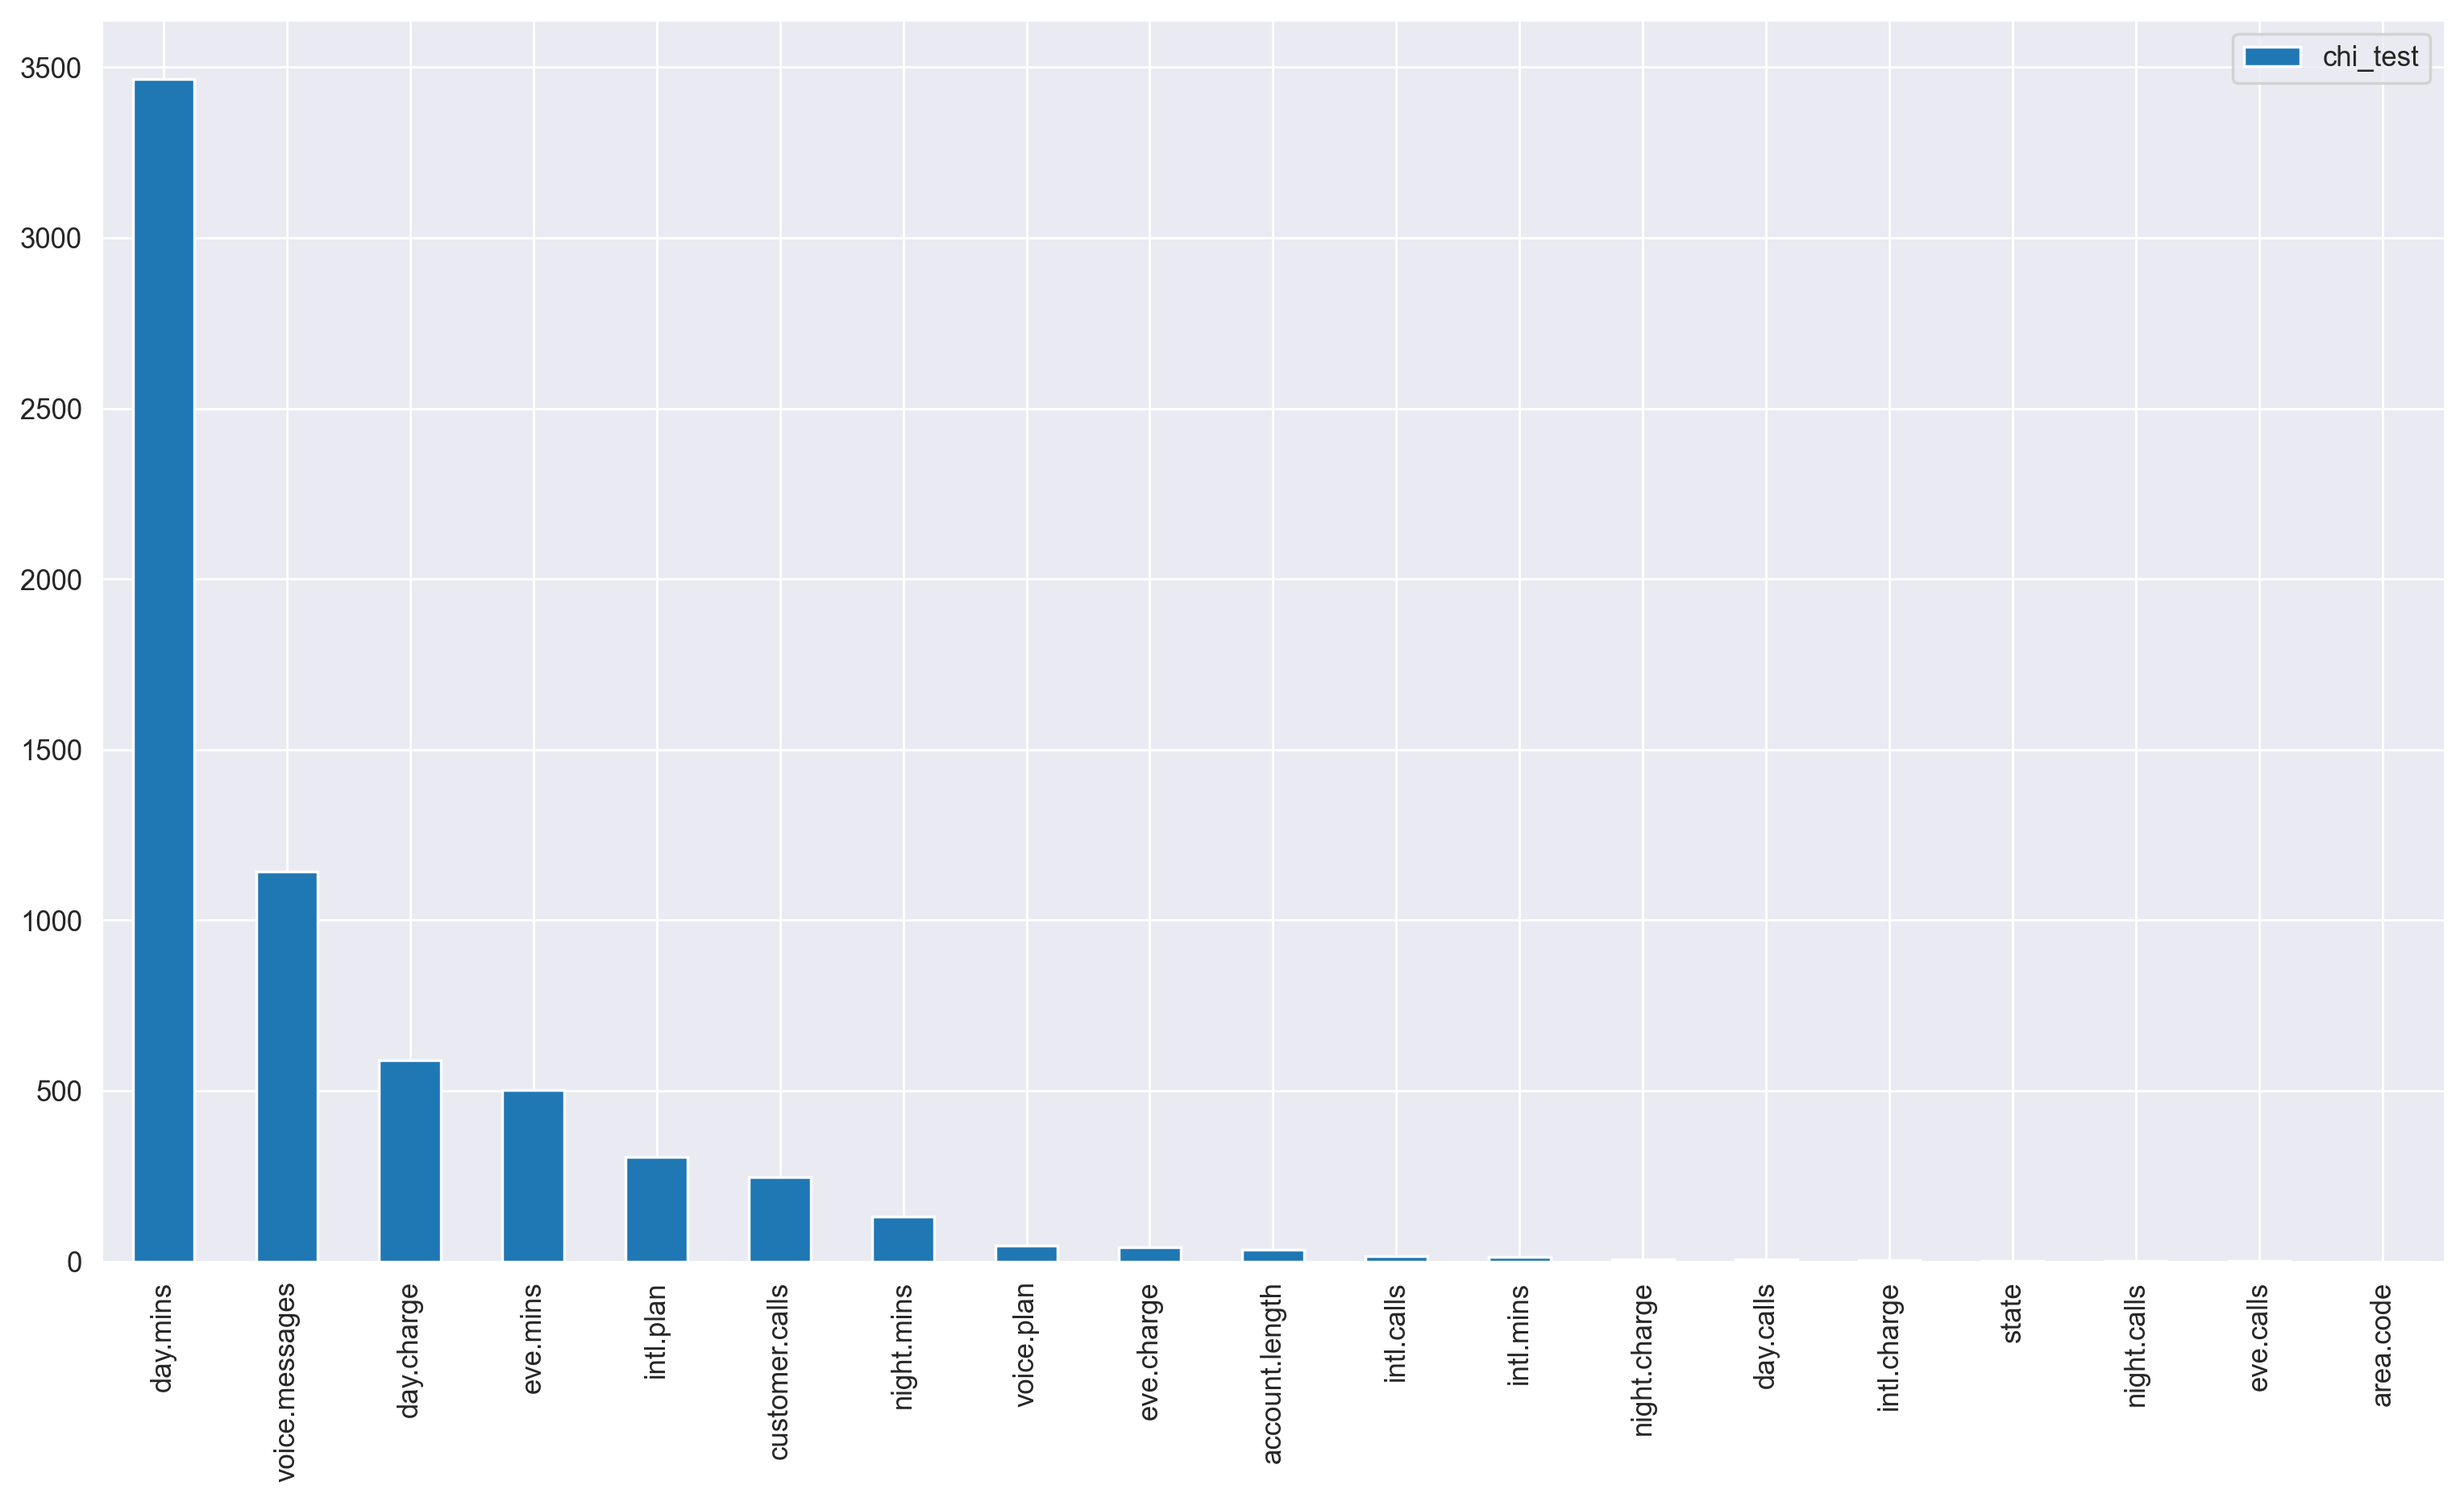

In [96]:
r.sort_values(by='chi_test', ascending=False).plot(kind='bar')

<Axes: >

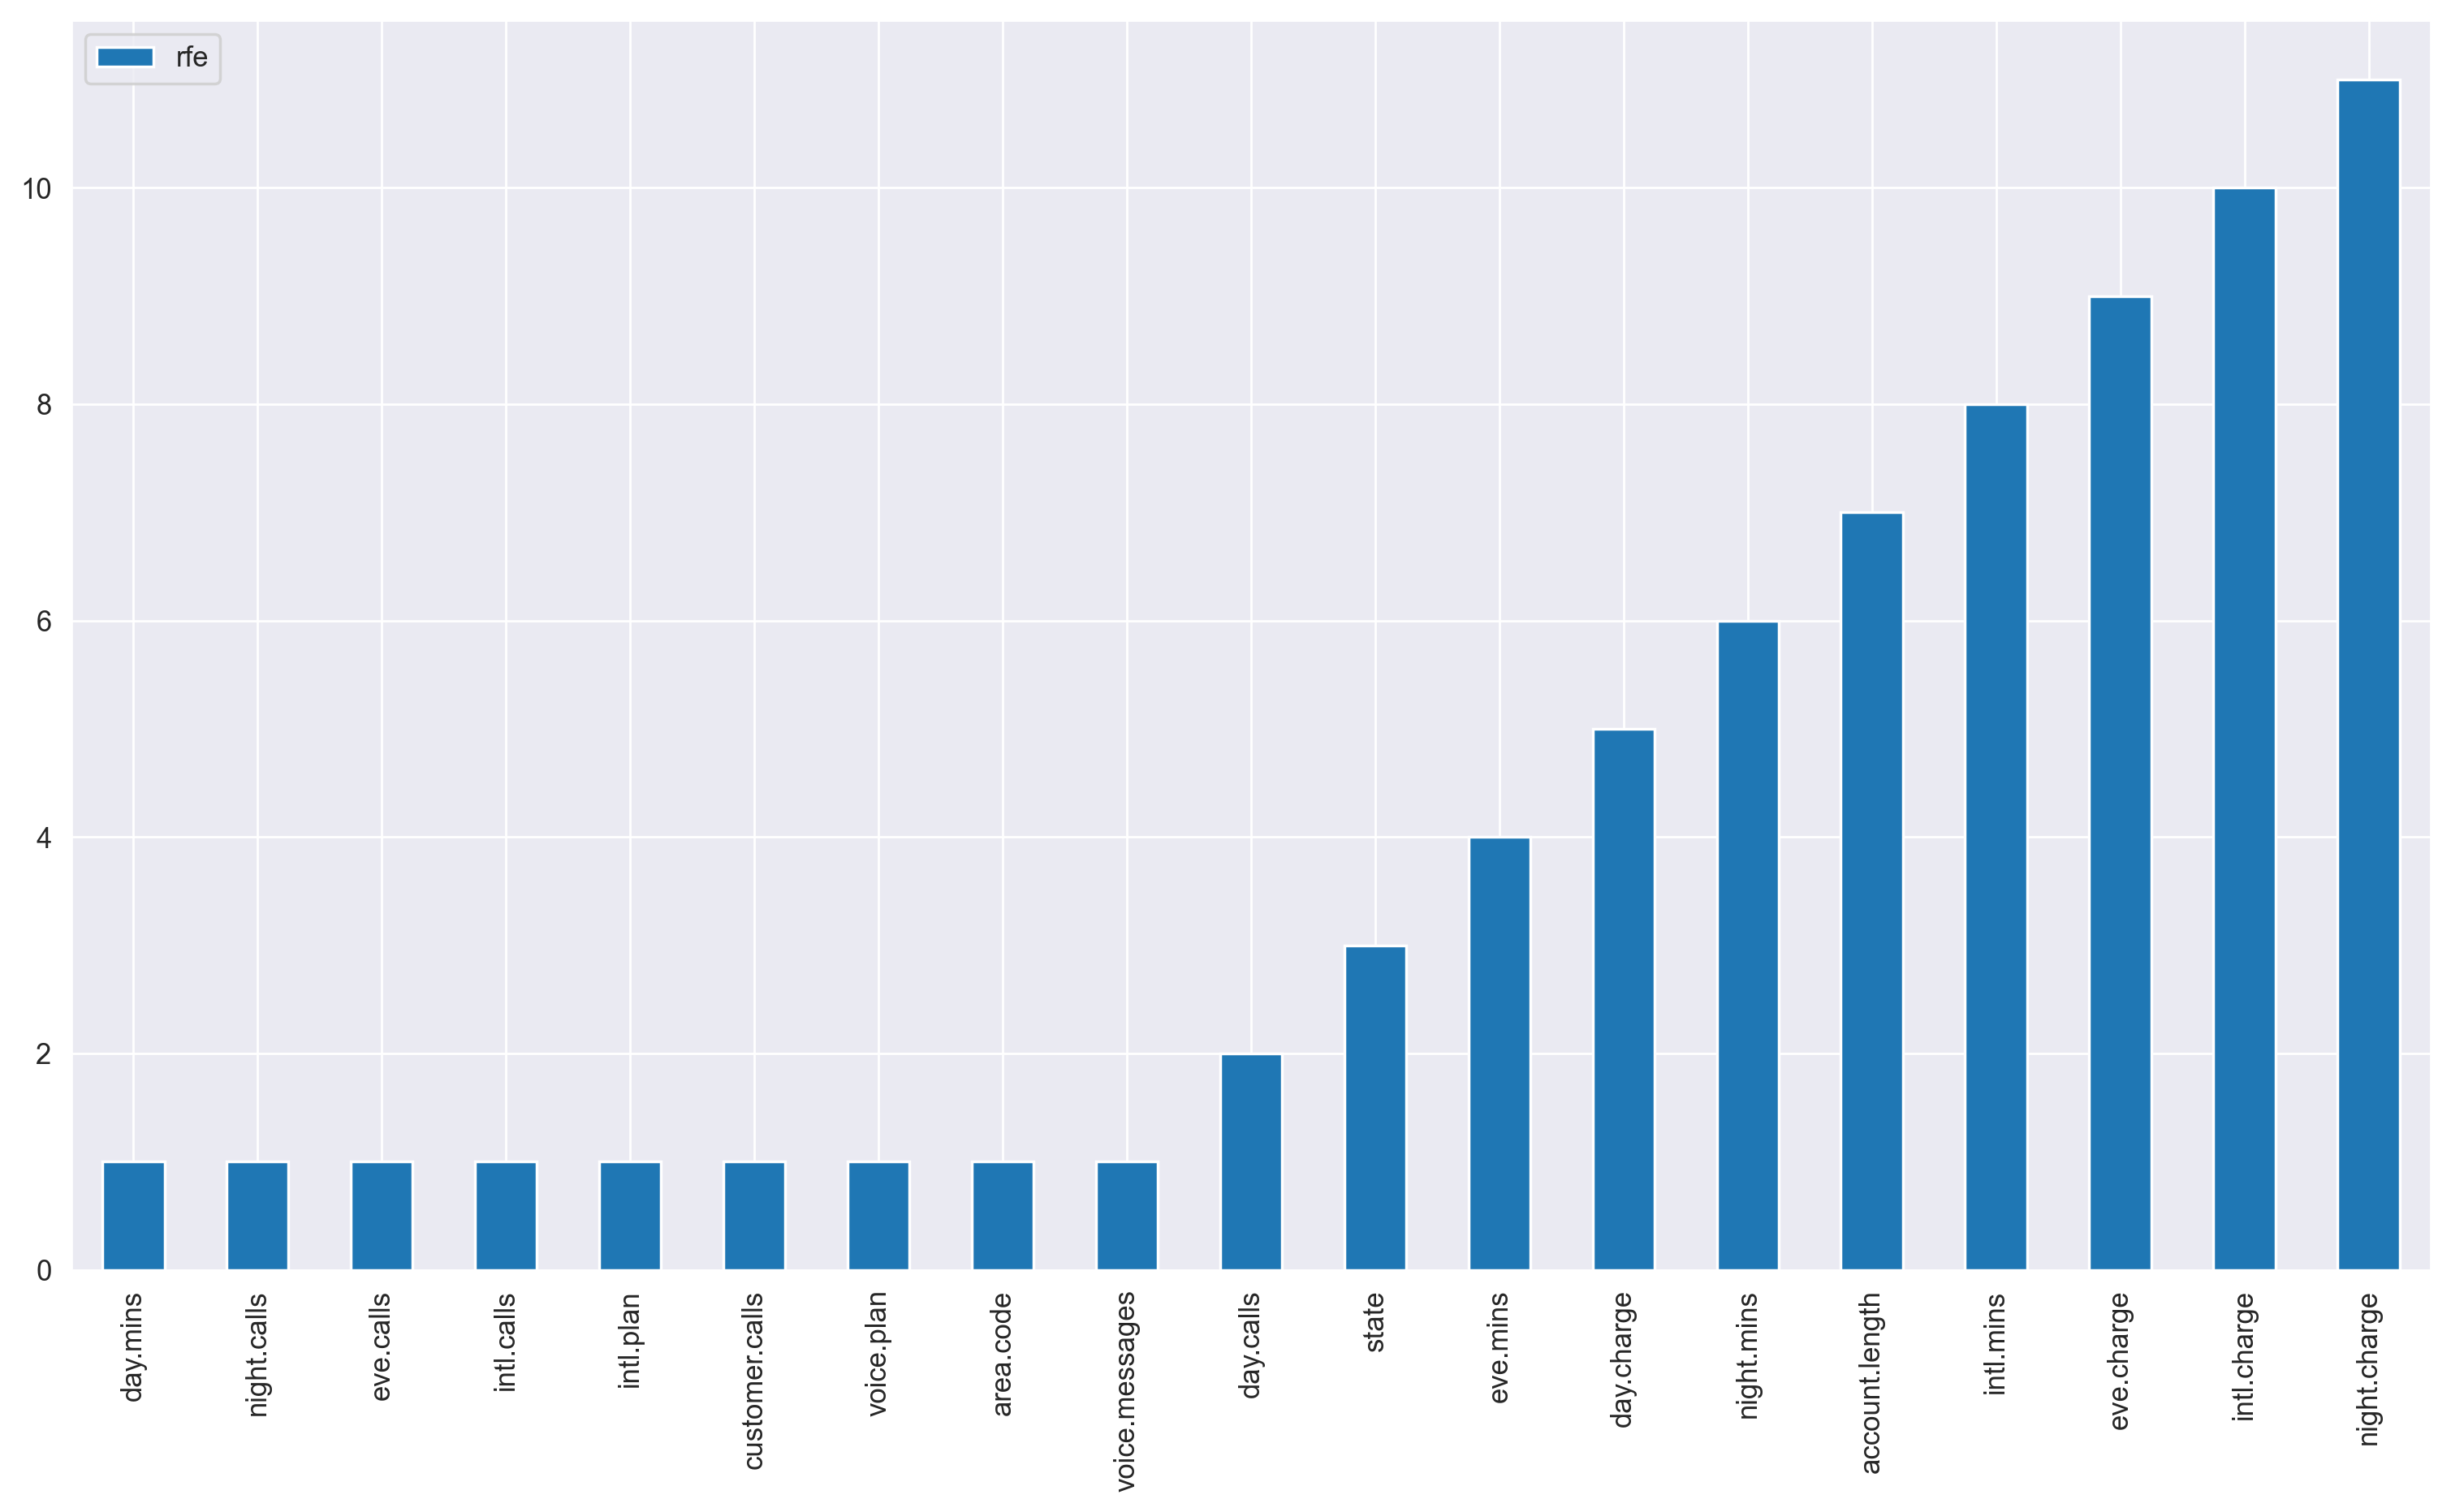

In [97]:
r2.sort_values(by='rfe').plot(kind='bar')

<Axes: xlabel='IG', ylabel='Features'>

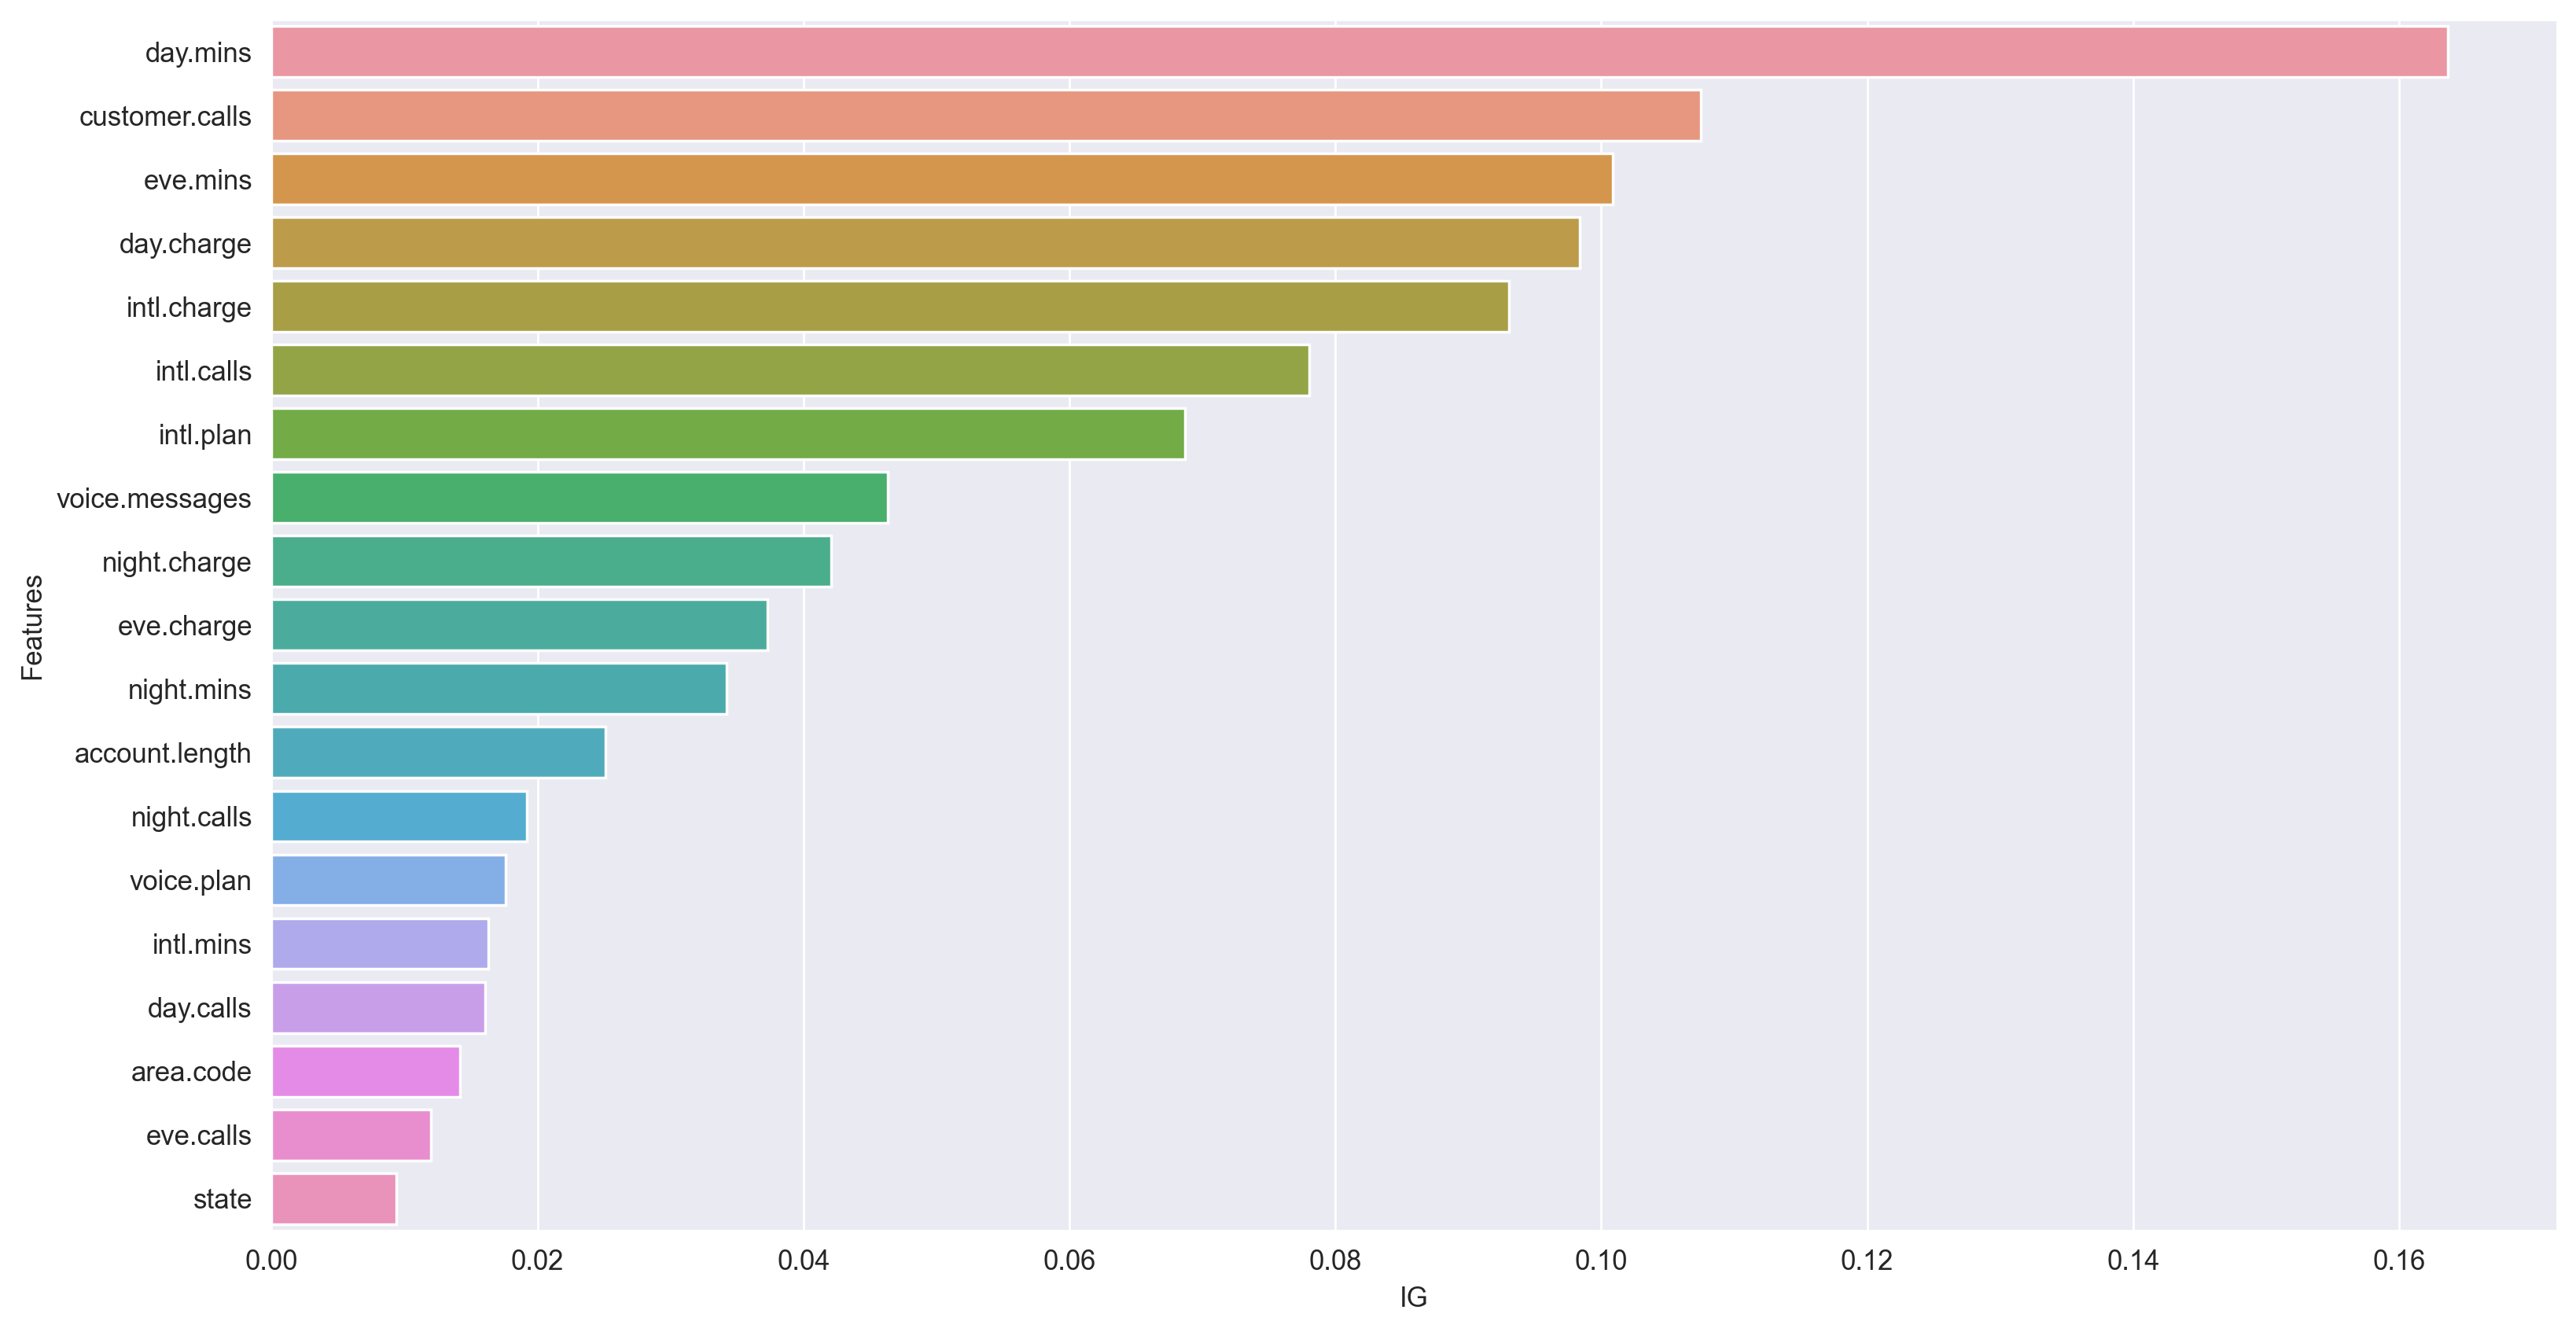

In [98]:
sns.barplot(x = imp_cols.sort_values(by='IG', ascending=False).loc[:,'IG'],
            y = imp_cols.sort_values(by='IG', ascending=False).loc[:,'Features'])

### Picking Features After Feature Engineering

In [116]:
ch = pd.read_csv(r'C:\Users\Kunal Mallick\Documents\GitHub\Churn_Prediction\Data Preprocessing & EDA\eda.csv')

ch.columns

Index(['account.length', 'voice.messages', 'intl.mins', 'intl.calls',
       'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins',
       'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn', 'area_code_408', 'area_code_415',
       'area_code_510', 'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'voice.plan

#### Filtering Columns

In [117]:
x = ch.iloc[:,[1,2,3,5,7,8,14,70,71,72,73]]

x

,voice.messages,intl.mins,intl.calls,day.mins,day.charge,eve.mins,customer.calls,voice.plan_no,voice.plan_yes,intl.plan_no,intl.plan_yes
0,25,10.0,3,265.1,45.07,197.4,1,0,1,1,0
1,26,13.7,3,161.6,27.47,195.5,1,0,1,1,0
2,0,12.2,5,243.4,41.38,121.2,0,1,0,1,0
3,0,6.6,7,299.4,50.90,61.9,2,1,0,0,1
4,0,10.1,3,166.7,28.34,148.3,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4864,40,9.9,5,235.7,40.07,223.0,2,0,1,1,0
4865,0,14.7,2,184.2,31.31,256.8,3,1,0,1,0
4866,0,13.6,4,140.6,23.90,172.8,1,1,0,1,0
4867,0,8.5,6,188.8,32.10,171.7,0,1,0,1,0


## Normalizing The Dataset

In [118]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [119]:
scaled_x

,voice.messages,intl.mins,intl.calls,day.mins,day.charge,eve.mins,customer.calls,voice.plan_no,voice.plan_yes,intl.plan_no,intl.plan_yes
0,1.266887,-0.096364,-0.581504,1.619872,1.620158,-0.063042,-0.436279,-1.658661,1.658661,0.323005,-0.323005
1,1.340574,1.243374,-0.581504,-0.358472,-0.358761,-0.100639,-0.436279,-1.658661,1.658661,0.323005,-0.323005
2,-0.575284,0.700237,0.231750,1.205088,1.205260,-1.570865,-1.201220,0.602896,-0.602896,0.323005,-0.323005
3,-0.575284,-1.327475,1.045004,2.275497,2.275675,-2.744276,0.328662,0.602896,-0.602896,-3.095930,3.095930
4,-0.575284,-0.060155,-0.581504,-0.260989,-0.260939,-1.034618,1.093603,0.602896,-0.602896,-3.095930,3.095930
...,...,...,...,...,...,...,...,...,...,...,...
4864,2.372190,-0.132574,0.231750,1.057907,1.057965,0.443523,0.328662,-1.658661,1.658661,0.323005,-0.323005
4865,-0.575284,1.605466,-0.988131,0.073514,0.073003,1.112348,1.093603,0.602896,-0.602896,0.323005,-0.323005
4866,-0.575284,1.207165,-0.174877,-0.759876,-0.760167,-0.549819,-0.436279,0.602896,-0.602896,0.323005,-0.323005
4867,-0.575284,-0.639502,0.638377,0.161440,0.161830,-0.571586,-1.201220,0.602896,-0.602896,0.323005,-0.323005


## Performing Dimension Reductionality

### Creating PCA With Default Value

In [120]:
pca_def = PCA()
pcs_def = pca_def.fit_transform(scaled_x)
pcs_def

array([[ 2.69263150e+00,  1.18195495e+00, -1.97488259e+00, ...,
        -2.01791951e-04,  5.31718794e-13, -3.85510444e-18],
       [ 2.67186969e+00, -7.84749833e-01,  7.81808995e-02, ...,
         2.00638861e-04, -4.61418232e-15, -4.80569707e-16],
       [-1.01852101e+00,  9.29001558e-01, -1.51607098e+00, ...,
        -1.22186889e-04,  1.08690837e-16, -5.20938930e-16],
       ...,
       [-1.06922741e+00, -1.02792896e+00,  4.98353945e-01, ...,
         2.04203841e-04,  2.95266401e-16, -2.53351897e-17],
       [-1.04415653e+00, -1.16333780e-01, -5.03719738e-01, ...,
        -2.70676047e-04, -7.22526456e-17, -7.95847783e-18],
       [ 2.99161718e+00, -1.42865954e+00,  7.53126722e-01, ...,
        -1.20999152e-04,  1.47530572e-16,  6.14783937e-17]])

In [121]:
pca_def.explained_variance_ratio_

array([2.67455863e-01, 1.86423894e-01, 1.77503506e-01, 9.37780809e-02,
       9.10516362e-02, 8.94889245e-02, 8.87697754e-02, 5.52831573e-03,
       4.72952289e-09, 5.28793546e-30, 1.82101861e-33])

In [122]:
np.cumsum(pca_def.explained_variance_ratio_)

array([0.26745586, 0.45387976, 0.63138326, 0.72516134, 0.81621298,
       0.9057019 , 0.99447168, 1.        , 1.        , 1.        ,
       1.        ])

- As it is clear that 100% of the data came from the first column alone, we will use n component 8.

### Creating PCA With 8 Component

In [123]:
pca_8 = PCA(n_components = 8)
pcs_8 = pca_8.fit_transform(scaled_x)
pcs_8

array([[ 2.6926315 ,  1.18195495, -1.97488259, ..., -0.1544328 ,
        -0.64174056,  0.2984887 ],
       [ 2.67186969, -0.78474983,  0.0781809 , ...,  0.60455181,
        -1.09430341,  0.23008752],
       [-1.01852101,  0.92900156, -1.51607098, ..., -0.96556416,
        -0.95020871, -0.01473091],
       ...,
       [-1.06922741, -1.02792896,  0.49835394, ...,  0.28754431,
        -0.86249862, -0.02201328],
       [-1.04415653, -0.11633378, -0.50371974, ..., -1.40088388,
        -0.09147695, -0.01627929],
       [ 2.99161718, -1.42865954,  0.75312672, ..., -0.98198633,
         3.03020273, -0.23103488]])

#### Creating DataFrame

In [124]:
def col_pc_n(n):

    col = []
    p = 'pc'

    for i in range(0,n):
        col_n = p + str(i)
        col.append(col_n)

    return col

In [125]:
ch_scaled_pca = pd.DataFrame(pcs_8, columns=col_pc_n(8))
ch_scaled_pca['churn'] = y

ch_scaled_pca

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,churn
0,2.692632,1.181955,-1.974883,-0.100607,-0.155825,-0.154433,-0.641741,0.298489,0
1,2.671870,-0.784750,0.078181,0.367823,0.581266,0.604552,-1.094303,0.230088,0
2,-1.018521,0.929002,-1.516071,0.874506,1.351654,-0.965564,-0.950209,-0.014731,0
3,-0.869100,5.387429,0.648361,-0.809415,1.725970,-2.427427,1.162079,0.017789,0
4,-0.914663,2.872560,3.281747,-1.473765,0.947660,-0.115989,0.174023,-0.001529,0
...,...,...,...,...,...,...,...,...,...
4864,3.302251,0.589227,-1.398595,0.030614,-0.241689,0.305684,0.478651,-0.602262,0
4865,-1.013068,-0.198165,-0.287355,-0.303650,0.053433,2.396454,-0.527177,-0.020233,0
4866,-1.069227,-1.027929,0.498354,0.526256,0.921987,0.287544,-0.862499,-0.022013,1
4867,-1.044157,-0.116334,-0.503720,0.753861,-0.089537,-1.400884,-0.091477,-0.016279,0


## Exporting Dataframe

In [127]:
#ch_scaled_pca.to_csv('Feature.csv', index=False)